# Encoding Numerical Data  
### (Binning & Binarization)

When numerical data needs to be simplified, grouped, or converted into categorical form, we use **Binning** or
**Binarization**. These techniques help reduce complexity and improve interpretability in certain models.

---

## 1. Binning (Discretization)

Binning converts continuous numerical values into discrete intervals called **bins**.  
Instead of using exact numeric values, data points are grouped into ranges.

---

### Why Use Binning?

Binning is useful because it:
- Reduces noise in data  
- Helps handle outliers  
- Converts numerical features into categorical features  
- Improves interpretability  
- Works well with rule-based and tree-based models  

---

### Types of Binning

#### 1. Equal-Width Binning (Uniform Binning)
- Each bin has the same numerical width  
- Sensitive to outliers  

**Example:**
- Age: 0–20, 21–40, 41–60

---

#### 2. Equal-Frequency Binning (Quantile Binning)
- Each bin contains approximately the same number of samples  
- Robust to outliers  

**Example:**
- Quartiles: Q1, Q2, Q3, Q4

---

#### 3. Custom Binning
- User-defined intervals based on domain knowledge  

**Example:**
- Income → Low, Medium, High

---

### When to Use Binning

- When relationships between features and target are non-linear  
- When a numerical feature has too many unique values  
- When converting numerical features for categorical or tree-based models  
- When interpretability is important  

---

## 2. Binarization

Binarization converts numerical values into **binary values (0 or 1)** using a predefined threshold.

---

### Why Use Binarization?

Binarization is useful because it:
- Highlights presence vs absence  
- Separates low vs high values  
- Simplifies numerical features  
- Is common in image and text processing  

---

### Types of Binarization

#### 1. Threshold Binarization
- Assigns 1 if value exceeds a threshold, otherwise 0  

**Example:**
- Income > 50,000 → 1  
- Income ≤ 50,000 → 0  

---

#### 2. Label Binarization (Target Encoding)
- Converts binary or multi-class target labels into binary form  

**Example:**
- Pass / Fail  
- Buy / Not Buy  

---

### When to Use Binarization

- For binary classification problems  
- When a meaningful threshold exists  
- When simplifying numerical values improves model performance  

---

## Summary Table

| Method | Output | Best Used For | Example |
|------|-------|--------------|--------|
| Binning | Numerical → Categorical | Noise reduction, interpretability | Age groups |
| Binarization | Numerical → 0 / 1 | Threshold-based decisions | Income > 50k |

---

## Summary

Binning and binarization are simple yet powerful techniques for encoding numerical data.
They help reduce noise, improve interpretability, and adapt numerical features for models
that benefit from simplified or categorical representations.


In [1]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv('Titanic.csv' ,usecols=['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
380,1,42.0,227.5250
148,0,36.5,26.0000
666,0,25.0,13.0000
369,1,24.0,69.3000
127,1,24.0,7.1417


In [10]:
df.dropna(inplace=True)

df.shape

(714, 3)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [13]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X,y

(      Age     Fare
 0    22.0   7.2500
 1    38.0  71.2833
 2    26.0   7.9250
 3    35.0  53.1000
 4    35.0   8.0500
 ..    ...      ...
 885  39.0  29.1250
 886  27.0  13.0000
 887  19.0  30.0000
 889  26.0  30.0000
 890  32.0   7.7500
 
 [714 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(571, 2)

## Quantile Binning

In [19]:
def quantile_binning_plot(df, column, n_bins=10):

    # -------- BEFORE PLOT --------
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} Distribution (Before Binning)")

    # Create quantile bins
    binned_col = pd.qcut(df[column], q=n_bins, duplicates='drop')

    # -------- AFTER PLOT --------
    plt.subplot(1, 2, 2)
    sns.countplot(x=binned_col)
    plt.xticks(rotation=45)
    plt.title(f"{column} Distribution (After Quantile Binning into {n_bins} bins)")

    plt.tight_layout()
    plt.show()

    return binned_col


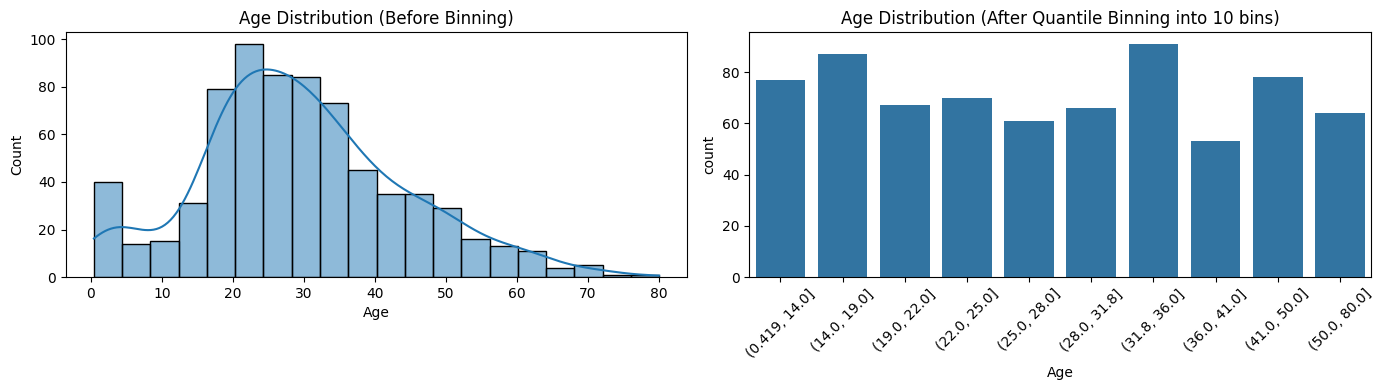

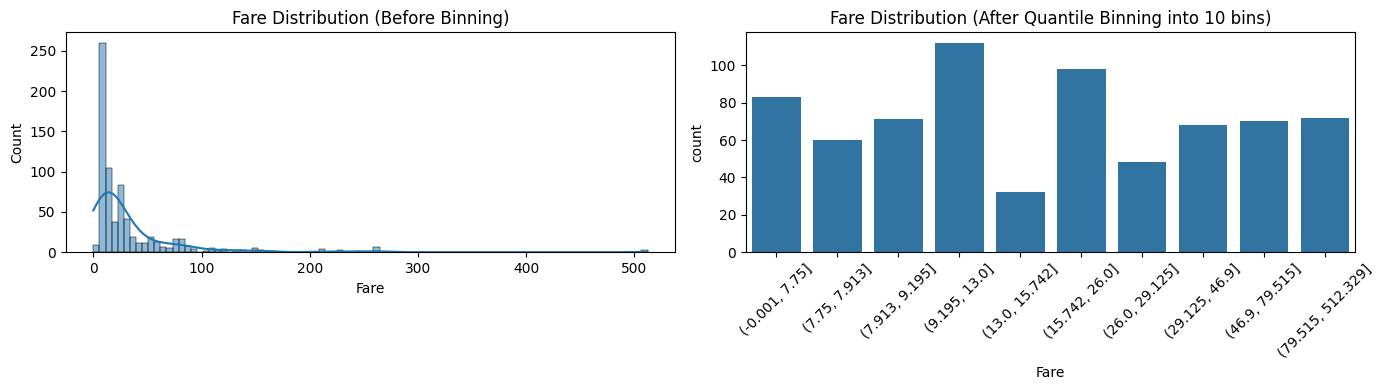

In [20]:
# AGE — 10 quantile bins
df["Age_binned"] = quantile_binning_plot(df, "Age", n_bins=10)

# FARE — 10 quantile bins
df["Fare_binned"] = quantile_binning_plot(df, "Fare", n_bins=10)


## Uniform Binning

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def uniform_binning_plot(df, column, n_bins=10):

    # -------- BEFORE PLOT --------
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} Distribution (Before Binning)")

    # Uniform (equal-width) binning
    binned_col = pd.cut(df[column], bins=n_bins)

    # -------- AFTER PLOT --------
    plt.subplot(1, 2, 2)
    sns.countplot(x=binned_col)
    plt.xticks(rotation=45)
    plt.title(f"{column} Distribution (After Uniform Binning into {n_bins} bins)")

    plt.tight_layout()
    plt.show()

    return binned_col


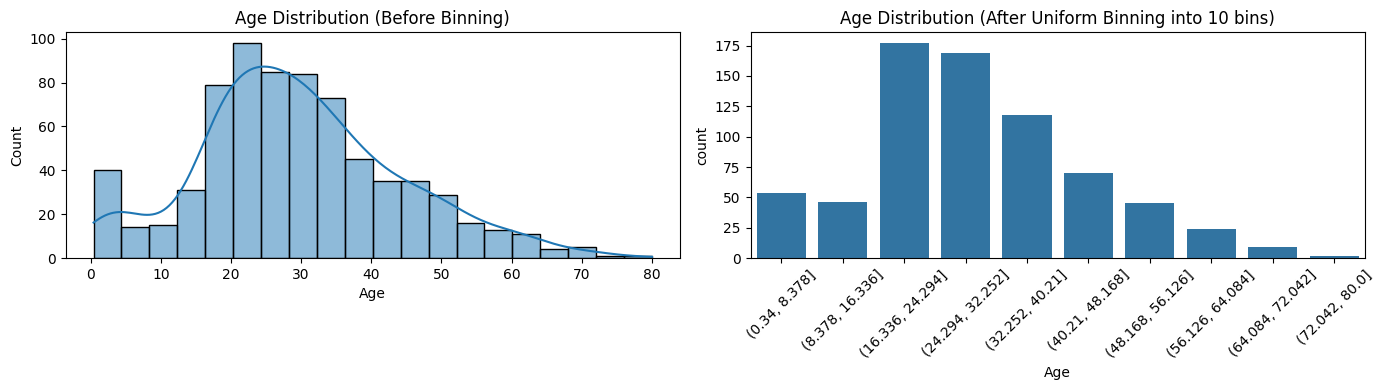

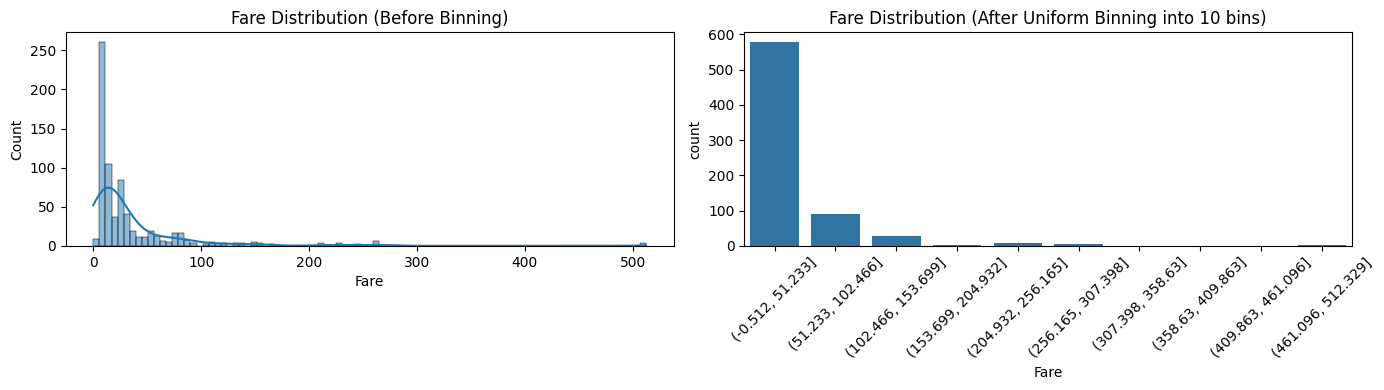

In [24]:
# AGE — 10 quantile bins
df["Age_binned"] = uniform_binning_plot(df, "Age", n_bins=10)

# FARE — 10 quantile bins
df["Fare_binned"] = uniform_binning_plot(df, "Fare", n_bins=10)
